# Análise Exploratória de Dados com Pandas

## Projeto Bootcamp Cientista de Dados
Este arquivo contêm duas análises exploratórias de dois datasets em formatos diferentes: um em .csv e outro em .xlsx

### Análise Exploratória 1 - CSV

Para as duas análises usaremos a biblioteca 'pandas'.

In [1]:
# Importando a biblioteca pandas
import pandas as pd

Até então, não nos é fornecido o conteúdo do nosso arquivo csv. Assim, vamos usar a função 'read_csv' para ler o conteúdo do arquivo.

In [2]:
df = pd.read_csv('/home/cicero_hitzschky/Desktop/Dio/DataScientist/AnaliseDadosPandas/datasets/Gapminder.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 665, saw 2


Nao conseguimos visualizar o conteúdo por conta de um erro em uma das suas linhas. Para resolver isso, vamos mudar o parâmetro 'erro_bad_lines' para false. Desta forma, todos os erros serão ignorados e poderemos visualizar nossos dados.

In [3]:
df = pd.read_csv('/home/cicero_hitzschky/Desktop/Dio/DataScientist/AnaliseDadosPandas/datasets/Gapminder.csv', error_bad_lines=False)


/tmp/ipykernel_5657/50282907.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/home/cicero_hitzschky/Desktop/Dio/DataScientist/AnaliseDadosPandas/datasets/Gapminder.csv', error_bad_lines=False)
Skipping line 665: expected 1 fields, saw 2
Skipping line 666: expected 1 fields, saw 2
Skipping line 667: expected 1 fields, saw 2
Skipping line 668: expected 1 fields, saw 2
Skipping line 669: expected 1 fields, saw 2
Skipping line 670: expected 1 fields, saw 2
Skipping line 671: expected 1 fields, saw 2
Skipping line 672: expected 1 fields, saw 2
Skipping line 673: expected 1 fields, saw 2
Skipping line 674: expected 1 fields, saw 2
Skipping line 675: expected 1 fields, saw 2
Skipping line 676: expected 1 fields, saw 2
Skipping line 677: expected 1 fields, saw 2
Skipping line 678: expected 1 fields, saw 2
Skipping line 679: expected 1 fields, saw 2
Skipping line 680: expected 1 

Os erros não foram retornados, assim, vamos visualizar as 10 primeiras linhas do nosso dataset

In [4]:
df.head(10)

,country;continent;year;lifeExp;pop;gdpPercap
0,Afghanistan;Asia;1952;28.801;8425333;779.4453145
1,Afghanistan;Asia;1957;30.332;9240934;820.8530296
2,Afghanistan;Asia;1962;31.997;10267083;853.1007...
3,Afghanistan;Asia;1967;34.02;11537966;836.1971382
4,Afghanistan;Asia;1972;36.088;13079460;739.9811...
5,Afghanistan;Asia;1977;38.438;14880372;786.11336
6,Afghanistan;Asia;1982;39.854;12881816;978.0114388
7,Afghanistan;Asia;1987;40.822;13867957;852.3959...
8,Afghanistan;Asia;1992;41.674;16317921;649.3413...
9,Afghanistan;Asia;1997;41.76300000000001;222274...


Comumente, um arquivo csv é separado por vírgulas como o próprio nome sugere. Entretando, visualizando as linhas acima vemos que estão separadas por ';'. Consertaremos isso no código a seguir. 

In [5]:
# Mudaremos o parâmetro 'sep' para que o pandas entenda que o arquivo está
# separado por ';' e não por ','.

df = pd.read_csv('/home/cicero_hitzschky/Desktop/Dio/DataScientist/AnaliseDadosPandas/datasets/Gapminder.csv', error_bad_lines=False, sep=';')
df.head(10)



/tmp/ipykernel_5657/2313788506.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/home/cicero_hitzschky/Desktop/Dio/DataScientist/AnaliseDadosPandas/datasets/Gapminder.csv', error_bad_lines=False, sep=';')


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


Note que ao rodar o código acima não tivemos nenhuma linha pulada como no nosso problema inicial. Isso indica que o erro era a forma que o pandas estava separando os dados. Para ficar mais clara nossos 'insights' para o público (os tomadores de decisão, por exemplo) vamos traduzir os nomes das colunas do nosso dataset.

In [6]:
df = df.rename(columns={
    'country': 'pais',
    'continent': 'continente',
    'year': 'ano',
    'lifeExp': 'expectativa de vida',
    'pop': 'populacao',
    'gdpPercap':'pib'
    })
df.head()

,pais,continente,ano,expectativa de vida,populacao,pib
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


É importante saber a quantidade de dados que estamos trabalhando. Para isso usamos o atributo 'shape' e ele retornará (linhas, colunas) do nosso dataset.

In [7]:
# total de linhas e colunas 
df.shape

(3312, 6)

Sabemos as dimensões, agora vamos verificar os tipos de dados que encontramos

In [8]:
# Tipos de dados em cada coluna.
df.dtypes


pais                    object
continente              object
ano                      int64
expectativa de vida    float64
populacao                int64
pib                    float64
dtype: object

Finalmente, vamos retonar nossos primeiros dados estatísticos

In [9]:
df.describe()

,ano,expectativa de vida,populacao,pib
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165876
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


Acima temos algumas informações, entretanto muito gerais tais como média aritmética de cada coluna, desvio padrão, valores mínimos e máximos. Através do máximos e minímo conseguimos uma informação na coluna anos.

---
##### Informação: Os dados sao de 1950 até 2007
---

Vamos, agora, verficar quais são os continentes que temos na coluna continentes.

In [10]:
df['continente'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

Assim, podemos fazer um filtro e analisar por continente. Isso é útil se por exemplo quisermos responder à pergunta:

##### Pergunta 1: Qual é a expectavida de vida média na oceania no período de 1950 a 2007?

In [11]:
oceania = df.loc[df['continente'] == 'Oceania']
oceania.describe()

,ano,expectativa de vida,populacao,pib
count,74.00000,74.000000,7.400000e+01,74.000000
mean,1979.27027,70.396622,2.367617e+06,13078.961304
std,15.99426,6.388423,1.214119e+06,7064.848672
min,1950.00000,52.964000,1.510000e+05,864.974253
25%,1967.00000,68.870500,1.166084e+06,5679.365746
50%,1979.50000,71.340000,2.743575e+06,14940.586840
75%,1992.00000,74.300000,3.305738e+06,18554.854445
max,2007.00000,80.204000,4.115771e+06,25185.009110


Então a resposta a nossa pergunta seria:

##### Resposta 1: Aproximadamente 70.4 anos

Perceba que fazer isso para todos seria até viável no caso dos continentes. Entretando, copiar e colar esse código fazendo as devias alterações para os paises seria demasiadamente custoso e inprodutivo. Para isso, conseguimos obter essa informação de todos os continentes como segue

In [12]:
# abaixo vamos verificar a expectativa de vida média de cada continente 
df.groupby('continente')['expectativa de vida'].mean()

continente
Africa      48.518682
Americas    65.789711
Asia        62.242752
Europe      72.721644
FSU         68.800279
Oceania     70.396622
Name: expectativa de vida, dtype: float64

Podemos também reponder a seguinte pergunta:

##### Pergunta 2: Quantos paises estamos analisando em cada continente?

A resposta vem logo a seguir

In [13]:
df.groupby('continente')['pais'].nunique()

continente
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: pais, dtype: int64

Observe que apresentar os dados dessa forma não é nada interessante para os tomadores de decisão que precisam de informações prontas. Para visualizar os dados por meio de um gráfico de barras fazemos:

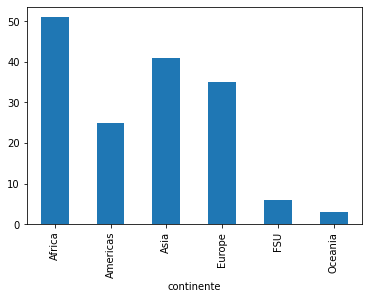

In [20]:

df.groupby('continente')['pais'].nunique().plot(kind ='bar');


Faremos outro gráfico para representar a expectativa de vida média anual.

In [31]:
ano_2007 = df.loc[df['ano']==2007]
display(ano_2007)

,pais,continente,ano,expectativa de vida,populacao,pib
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...,...
3263,Vietnam,Asia,2007,74.249,85262356,2441.576404
3275,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
3287,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
3299,Zambia,Africa,2007,42.384,11746035,1271.211593


In [52]:
ano_2007.describe()


,ano,expectativa de vida,populacao,pib
count,183.0,183.000000,1.830000e+02,183.000000
mean,2007.0,67.868557,3.581268e+07,12403.126861
std,0.0,11.021266,1.312861e+08,13829.021940
min,2007.0,39.613000,7.219400e+04,277.551859
25%,2007.0,60.877500,2.574062e+06,2146.820209
50%,2007.0,71.688000,8.078314e+06,6873.262326
75%,2007.0,75.903000,2.406151e+07,19003.511680
max,2007.0,82.603000,1.318683e+09,82010.978040


KeyError: 'Column not found: pais'